# H&M 고객 데이터

## 사전 준비

In [1]:
# 공통 셋업
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

if os.name == 'nt':
    plt.rcParams["font.family"] = "Malgun Gothic"  # Windows 폰트 설정
elif os.name == 'posix':
    plt.rcParams["font.family"] = "AppleGothic"  # Mac 폰트 설정
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

# 데이터 로드
hm_path = "customer_hm.csv"
hm = pd.read_csv(hm_path)
hm.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


## 문제 1. 멤버 상태별 고객 수
멤버 상태별 고객 수를 막대그래프로 비교해 보세요. 막대는 많은 순서대로 정렬하고, 그래프 제목과 축 라벨을 알기 쉽게 적어 주세요.

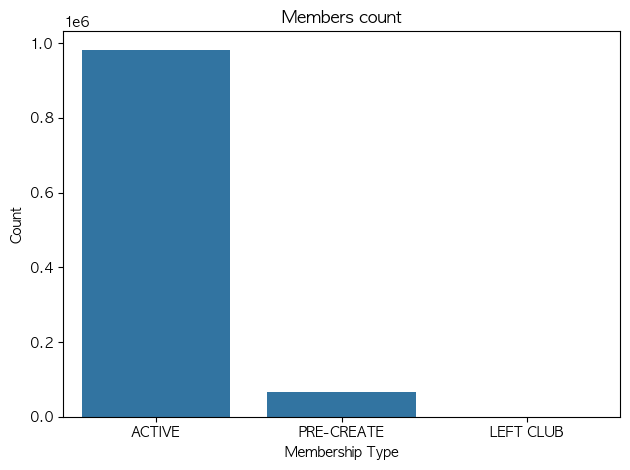

In [2]:
sns.countplot(data = hm, x='club_member_status')
plt.title('Members count')
plt.xlabel('Membership Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 문제 2. 패션 뉴스 구독 빈도별 고객 수
패션 뉴스 구독 빈도별 고객 수를 막대그래프로 그려 보세요. 보기 좋게 내림차순으로 정렬하세요.

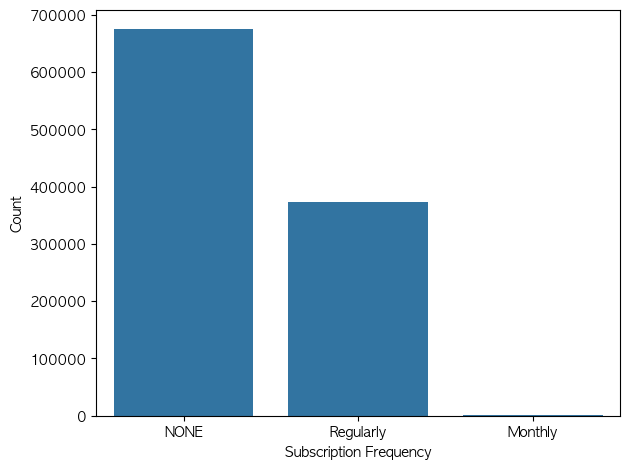

In [3]:
hm = hm.dropna()

cnt = hm['fashion_news_frequency']
order = cnt.value_counts().index

sns.countplot(data = hm , x = cnt, order = order)
plt.xlabel('Subscription Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 문제 3. 나이 분포
고객 나이의 분포를 히스토그램으로 나타내고, 적절한 구간 수를 선택해 주세요. 축 라벨과 제목을 넣어 주세요.

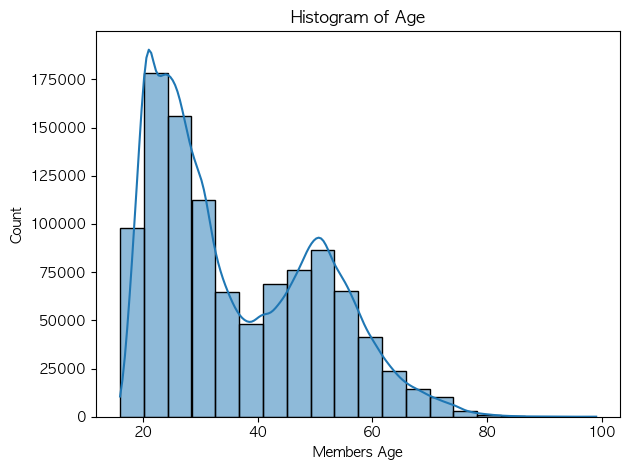

In [4]:
sns.histplot(hm['age'], bins = 20, kde=True)
plt.title('Histogram of Age')
plt.xlabel("Members Age")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 문제 4. Active=1 고객의 나이 분포
활성 고객(Active=1)만 선택해 나이 분포를 히스토그램으로 그려 보세요. 표본 수가 충분한지 함께 확인해 보세요.

표본 개수 : 362946


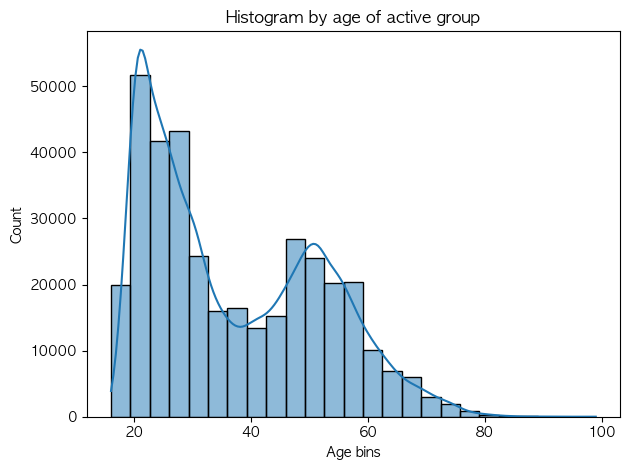

In [5]:
Active_Group = hm[hm['Active'] == 1].dropna(subset=['age'])
print(f'표본 개수 : {Active_Group['age'].count()}')

sns.histplot(data = Active_Group, x = 'age' , bins= 25, kde=True )
plt.title('Histogram by age of active group')
plt.xlabel('Age bins')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 문제 5. 멤버 상태별 나이 분포(박스플롯)
멤버 상태에 따라 나이 분포가 어떻게 다른지 박스플롯으로 비교해 보세요. 이상치가 보인다면 간단히 언급해 주세요.

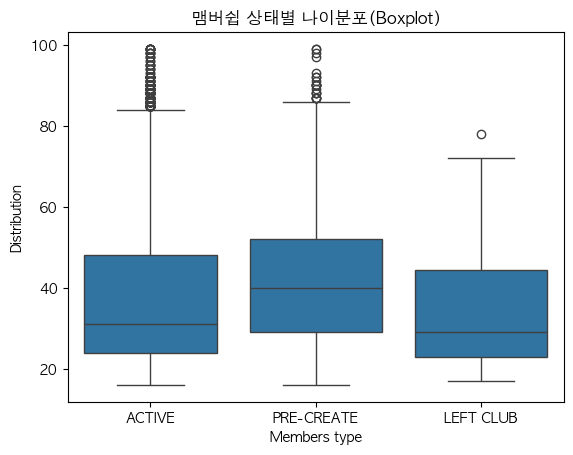

In [6]:
hm_age = hm.dropna(subset=['age'])

sns.boxplot(data= hm_age, x='club_member_status' , y= 'age')
plt.title('맴버쉽 상태별 나이분포(Boxplot)')
plt.xlabel('Members type')
plt.ylabel('Distribution')
plt.show();

## 문제 6. 멤버 상태별 평균 나이
각 멤버 상태의 평균 나이를 막대그래프로 보여 주세요. 값의 크기 순서로 정렬하면 더 읽기 쉽습니다.

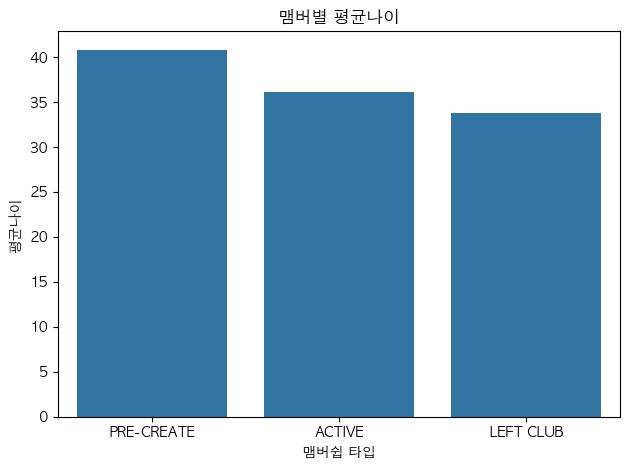

In [7]:
age_avg = (hm.dropna(subset=['age'])
           .groupby(by ='club_member_status')['age']
           .mean()
           .round(2)
           .reset_index(name='age_avg'))


orders = age_avg.sort_values('age_avg',ascending=False)['club_member_status']

sns.barplot(data = age_avg, x= 'club_member_status', y='age_avg', order=orders )
plt.title('맴버별 평균나이')
plt.xlabel('맴버쉽 타입')
plt.ylabel('평균나이')
plt.tight_layout()
plt.show()

## 문제 7. 멤버 상태별 Active 비율
각 멤버 상태에서 Active(0/1)의 평균을 구해 비율 막대그래프로 나타내 보세요. y축 범위를 0~1로 맞추면 직관적입니다.

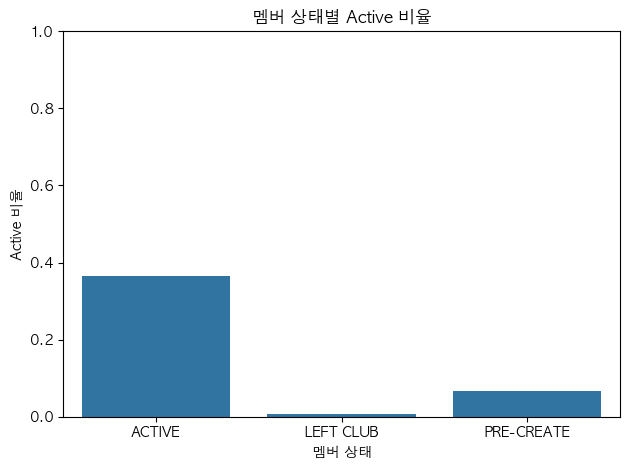

In [8]:
cnt_active = (hm.dropna(subset=['Active'])
              .groupby(by=['club_member_status'])['Active']
              .mean()
              .reset_index(name = 'Act_mean'))

sns.barplot(data = cnt_active, x = 'club_member_status', y = 'Act_mean', errorbar = None)
plt.ylim(0,1)
plt.title('멤버 상태별 Active 비율')
plt.xlabel('멤버 상태')
plt.ylabel('Active 비율')
plt.tight_layout()
plt.show()

## 문제 8. 패션 뉴스 구독 빈도별 Active 비율
패션 뉴스 구독 빈도별로 Active 비율을 비교하는 막대그래프를 그려 보세요. 막대 위아래 순서를 보기 좋게 정렬해 주세요.

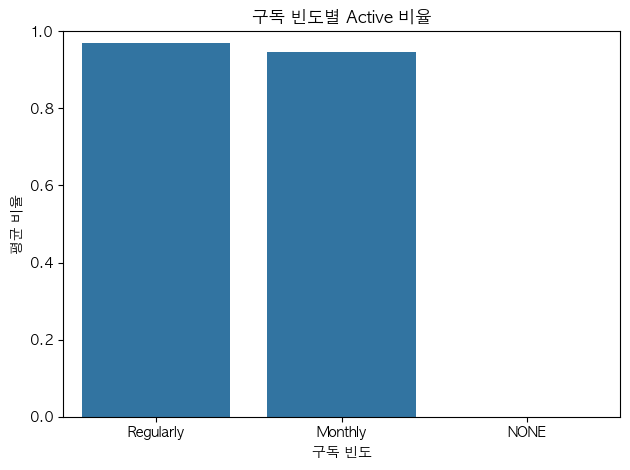

In [9]:
news_act = (hm.dropna(subset=['Active'])
            .groupby(by='fashion_news_frequency')['Active']
            .mean()
            .reset_index(name='news_by_active'))

orders = news_act.sort_values('news_by_active', ascending = False )['fashion_news_frequency']

sns.barplot(data = news_act , x = 'fashion_news_frequency', y= 'news_by_active', order = orders, errorbar = None)
plt.title('구독 빈도별 Active 비율')
plt.ylim(0,1)
plt.xlabel('구독 빈도')
plt.ylabel('평균 비율')
plt.tight_layout()
plt.show()

## 문제 9. 구독 빈도별 나이 분포 (바이올린)
패션 뉴스 구독 빈도에 따라 나이 분포가 어떻게 다른지 바이올린 플롯으로 비교해 보세요. 중앙값과 분위도 함께 보이도록 설정해 주세요.

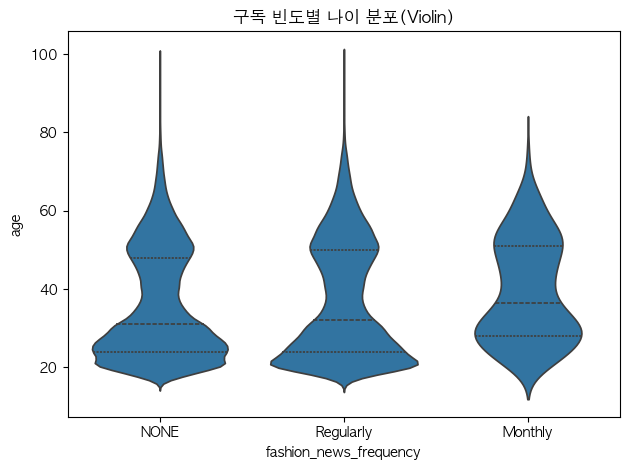

In [10]:
hm_age = hm.dropna(subset=['age'])

sns.violinplot(data = hm_age, x = 'fashion_news_frequency', y = 'age', inner= 'quartile')
plt.title('구독 빈도별 나이 분포(Violin)')
plt.xlabel('fashion_news_frequency')
plt.ylabel('age')
plt.tight_layout()
plt.show()

## 문제 10. 나이와 FN의 관계 (색상으로 구분)
나이와 FN 사이의 관계를 산점도로 그리고, 멤버 상태에 따라 색상으로 구분해 보세요. 보기 좋게 제목과 축 라벨을 넣어 주세요.

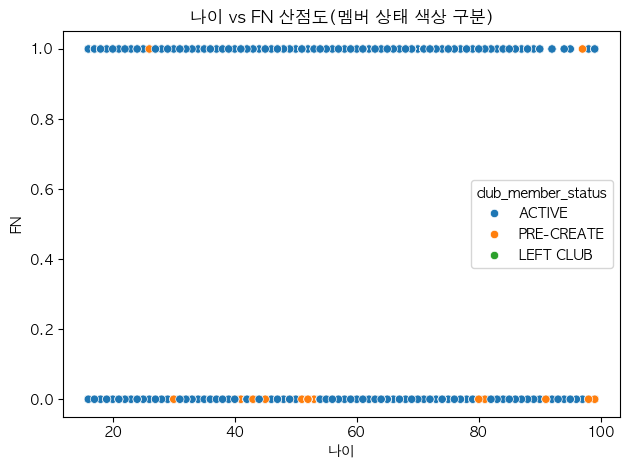

In [17]:
hm_fn = hm.dropna(subset=['FN','age'])


sns.scatterplot(data = hm_fn, x= 'age', y = 'FN', hue= 'club_member_status')

plt.title('나이 vs FN 산점도(멤버 상태 색상 구분)')
plt.xlabel('나이')
plt.ylabel('FN')
plt.tight_layout()
plt.show()

## 문제 11. 멤버 상태 × 구독 빈도 (행 기준 비율 히트맵)
멤버 상태와 패션 뉴스 구독 빈도의 관계를 표로 만든 뒤, 각 행이 100%가 되도록 비율로 변환해 히트맵으로 표현해 보세요. 셀에 값도 표시해 주세요.

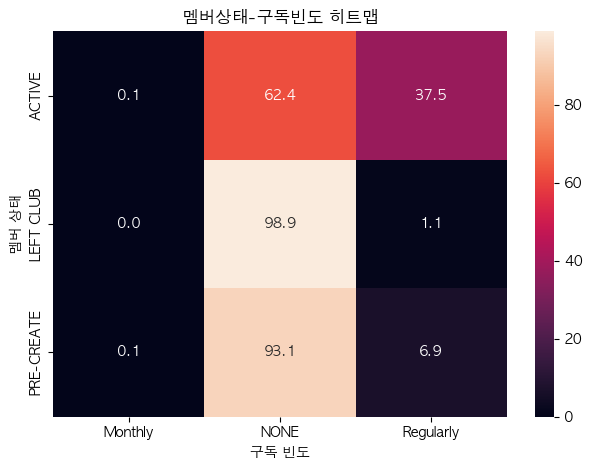

In [32]:
tab = pd.crosstab(hm['club_member_status'], hm['fashion_news_frequency'], normalize = 'index' )*100

sns.heatmap(tab, annot=True , fmt='.1f')

plt.title('멤버상태-구독빈도 히트맵')
plt.xlabel('구독 빈도')
plt.ylabel('멤버 상태')
plt.tight_layout()
plt.show()

## 문제 12. 구독 빈도별 나이 분포 (패싯 히스토그램)
패션 뉴스 구독 빈도별로 나이 히스토그램을 나란히 비교해 보세요. 가로로 여러 패널이 보이도록 배치하고, 축 범위를 공유해 주세요.

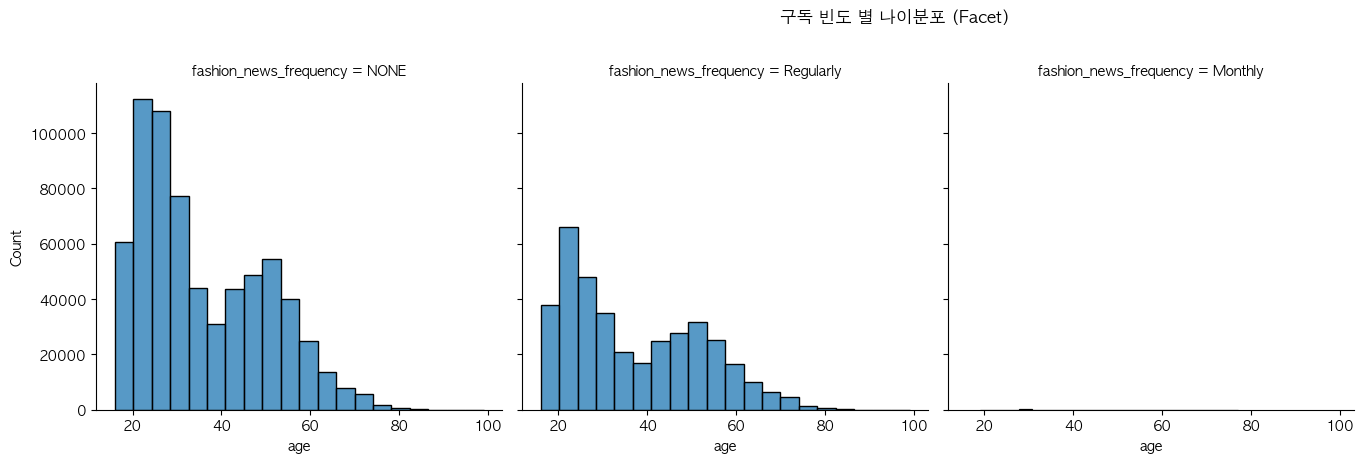

In [79]:
news_vs_age = hm.dropna(subset='age')



fnf = sns.FacetGrid(news_vs_age , col = 'fashion_news_frequency', col_wrap = 4, sharex = True, sharey = True, height=4.5)

facet_fnf = fnf.map_dataframe(sns.histplot, x = 'age', bins = 20)
fnf.fig.suptitle('구독 빈도 별 나이분포 (Facet)', y=1.02)
plt.tight_layout()
plt.show()

## 문제 13. 수치형 변수 상관관계 (히트맵)
데이터의 수치형 변수들 사이 상관관계를 히트맵으로 표현하고, 값도 함께 표시해 주세요. 강한 양/음의 상관이 보이는지 살펴보세요.

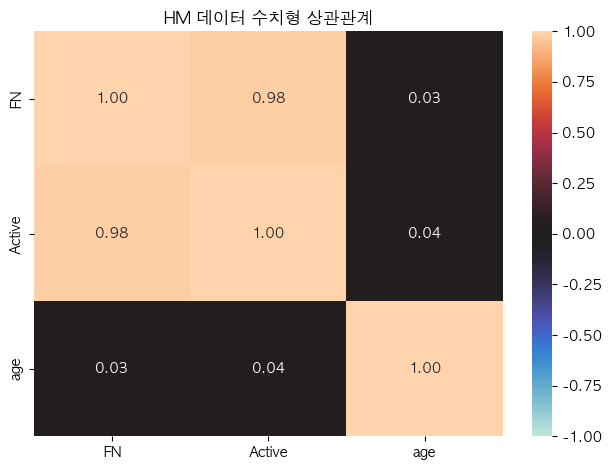

In [104]:
hm_dr = hm.dropna()

hm_int = hm_dr.select_dtypes(include = 'number')

if hm_int.shape[1] >= 2:
    hm_corr = hm_int.corr()
    sns.heatmap(hm_corr, annot=True, fmt='.2f', vmin = -1, vmax = 1, center = 0)
    plt.title('HM 데이터 수치형 상관관계')
    plt.tight_layout()
    plt.show()

else:
    print('정수형 변수가 1개 이하입니다.')